IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ung Thierry

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


## Partie 1 - Description du problème

Aujourd'hui, un consommateur peut donner son avis sur presque tout, et cela peut avoir un impact important vis-à-vis de l'entreprise. 
Une pensée populaire est de croire que les consommateurs ont tendance à laisser plus de commentaires négatifs que positifs sur internet. C'est ce qu'on va essayer de prouver.

## Partie 2 - Modèle

Afin de répondre à cette problématique, on va utiliser différents classifiers (KNN, Perceptron).

Pour ce faire, on va initialement définir les exemples selon leur Rating (+/- 4.3/5, défini afin de bien répartir les données), avant de classer selon leur sentiment moyen global et le nombre de commentaires. 

Dans un premier temps, on va faire un nouveau dataFrame contenant à la fois le nombre de commentaires par application et leurs sentiments moyen associés.
Ensuite on fera disparaître toutes les lignes qui ne nous interésse pas : 
- S'il n'y a pas de commentaire pour une application donnée
- Si le nombre de review est supérieur à 50 000, afin de limiter notre modèle 

Nous aurons donc au final, un ensemble d'application qu'on supposera "bien" et un autre qu'on supposera "mauvais", qu'on classera selon le nombre de commentaire et sentiment moyen. 

## Partie 3 - Code



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random

# importation de Classifiers
from iads import Classifiers

# importation de utils
from iads import utils

#### 1. Nettoyage du dataset

In [2]:
#On importe les dataFrame
df = pd.read_csv('data\googleplaystore.csv')
df_user = pd.read_csv('data\googleplaystore_user_reviews.csv')

# Pour commencer on se débarasse des NaN présent
df = df.dropna()
df_user = df_user.dropna()

# Mise au bon format de la colonne reviews
df['Reviews'] = df['Reviews'].apply(lambda x:int(x))

# Mise au bon format de la colonne Sentiment
df_user.loc[:,'Sentiment'] = df_user.loc[:,'Sentiment'].apply(lambda x : 1 if (x == 'Positive') else -1)

# Pour finir on se débarasse encore des NaN présent
df = df.dropna()
df_user = df_user.dropna()

df.head(5)
df_user.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
4,10 Best Foods for You,Best idea us,1,1.00,0.300000
5,10 Best Foods for You,Best way,1,1.00,0.300000


#### 2. Création d'un nouveau dataFrame résultat de la fusion des deux précédents

In [3]:
# On crée un Dictionnaire
dico = dict()

dico["App"] = list(df['App'].values)
dico["Rating"] = list(df['Rating'].values)
dico["Reviews"] = list(df["Reviews"].values)
dico["Sentiment_pol_moyen"] = []
dico["Sentiment_sub_moyen"] = []
dico["Sentiment_moyen"] = []
dico["Commentary"] = []


# On regroupe les apps du dataFrame df_user
for i in dico['App']:
    tmp = df_user[df_user['App']==i] 
    dico["Commentary"].append(len(tmp['App'])) # On fait la somme des commentaires
    dico["Sentiment_moyen"].append(tmp['Sentiment'].mean()) # On fait la moyenne du sentiment global
    dico["Sentiment_pol_moyen"].append(tmp['Sentiment_Polarity'].mean()) # On fait la moyenne du sentiment Polarity 
    dico["Sentiment_sub_moyen"].append(tmp['Sentiment_Subjectivity'].mean()) # On fait la moyenne du sentiment Subjectivity

#Création du nouveau dataFrame
new_df = pd.DataFrame(dico, columns=['App', 'Rating', 'Reviews', "Commentary", "Sentiment_moyen", "Sentiment_pol_moyen", "Sentiment_sub_moyen"])

# On se débarasse des Applications sans commentaire
new_df = new_df.dropna()
new_df.head(5)

,App,Rating,Reviews,Commentary,Sentiment_moyen,Sentiment_pol_moyen,Sentiment_sub_moyen
1,Coloring book moana,3.9,967,44,0.181818,0.152652,0.641540
8,Garden Coloring Book,4.4,13791,90,0.422222,0.268483,0.523447
17,FlipaClip - Cartoon animation,4.3,194216,4,1.000000,0.412649,0.679226
20,Boys Photo Editor - Six Pack & Men's Suit,4.1,654,38,0.210526,0.283509,0.479298
24,Colorfit - Drawing & Coloring,4.7,20260,38,0.526316,0.171836,0.572762


In [4]:
# On fait une copie du dataFrame afin d'eviter de changer celui original
tmp = new_df.copy() 
tmp = tmp.dropna()
tmp = tmp[tmp["Reviews"] < 50000] # On enleve les reviews qui vont fausser notre classement

#### 3. Mise en place des données à analyser 

In [5]:
# Initialisation des données 
data_desc_g = []
data_label_g = []

# Choix des données à analyser selon l'index des colonnes 
abscisse = 3
ordonné = 4

#On ne connait pas à l'avance le nombre de -1/+1
cpt_moins = 0
cpt_plus = 0

for i in range(len(tmp['App'])):
    if float(tmp.iloc[i,1]) >= 4.3 :
        data_desc_g.append((tmp.iloc[i,abscisse], tmp.iloc[i,ordonné]))
        data_label_g.append(1)
        cpt_plus += 1
    else :
        data_desc_g.append((tmp.iloc[i,abscisse], tmp.iloc[i,ordonné]))
        data_label_g.append(-1)
        cpt_moins += 1

minus = 0
save = 0
if cpt_moins > cpt_plus : 
    minus = cpt_moins - cpt_plus
    save = -1
if cpt_moins < cpt_plus : 
    minus = cpt_plus - cpt_moins
    save = 1

#On va enlever des elements au hasard pour avoir autant de -1 et +1 
if minus != 0 : 
    while (minus > 0) : 
        # On prend un index au hasard
        r = random.randint(0, len(data_label_g)-1) 
        if data_label_g[r] == save : 
            del data_desc_g[r]
            del data_label_g[r]
            minus -= 1 

#### 4. Séparation des données d'entraînement et de test

In [6]:
# Par précaution on redéfini une nouvelle graine aléatoire
np.random.seed(42)

# On copie les dataset originaux
X = data_desc_g.copy()
Y = data_label_g.copy()

# Pourcentage utilisé pour le test (1-pourcentage = %train)

pourcentage = 0.15 # Ici je defini 15% pour le test et 85% pour le train
seuil = round((len(data_desc_g)*0.15)/2)
seuil_plus = seuil
seuil_moins = seuil

X_test = []
Y_test = []

while (seuil_plus > 0 or seuil_moins > 0) : 
    r = random.randint(0, len(Y)-1)
    if Y[r] == -1 and seuil_moins > 0 : 
        X_test.append(X[r])
        Y_test.append(Y[r])
        del X[r]
        del Y[r]
        seuil_moins-=1
    
    if Y[r] == 1 and seuil_plus > 0 : 
        X_test.append(X[r])
        Y_test.append(Y[r])
        del X[r]
        del Y[r]
        seuil_plus-=1

In [7]:
# On remets les données en place et les convertir en array numpy
X_train = np.asarray(X.copy())
Y_train = np.asarray(Y.copy())

X = np.asarray(data_desc_g.copy())
Y = np.asarray(data_label_g.copy())

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

data_desc_g = np.asarray(data_desc_g)
data_label_g = np.asarray(data_label_g)

# On Verifie 
print("Autant de +1/-1 pour le tout: ",np.count_nonzero(Y==1)==np.count_nonzero(Y==-1))
print("Autant de +1/-1 pour les tests :",np.count_nonzero(Y_test==1)==np.count_nonzero(Y_test==-1))
print("Autant de +1/-1 pour le train : ",np.count_nonzero(Y_train==1)==np.count_nonzero(Y_train==-1))

Autant de +1/-1 pour le tout:  True
Autant de +1/-1 pour les tests : True
Autant de +1/-1 pour le train :  True


## Partie 4 - Protocole expérimental

Le protocol expérimental est le suivant : 

### Etape 1 : Préparation des données
Afin de pouvoir prouver notre affirmation, on va devoir remodeler les données. 
En effet, on a besoin du nombre de commentaires et du sentiment global moyen par application. Pour ce faire un nouveau dataFrame sera mis en place, résultant de la fusion des deux fichier .csv fourni. 

### Etape 2 : Séparation des données d'entraînement et de test
Lors de la mis en place des dataset, on ne connait pas à l'avance le nombre d'exemple affilié à chaque label, c'est pour ca que nous allons devoir répartir équitablement les labels. 
Pour cela, il va falloir supprimer les labels en trop aléatoirement, jusqu'à ce que :
 (nombre(label==1) == nombre(label == -1))
 A partir des données obtenu, il faut séparer les données de tests de celle d'entraînements, et équitablement vis-à-vis des labels. 

### Etape 3 : Test 
Afin de pouvoir trouver la meilleure classification de données, on va les essayer sur plusieurs types de classifieurs : 
- KNN (pour k = 3 et k = 10)
- Perceptron 
- Perceptron avec prise en compte du biais

Pour chacun de ces classifiers, plusieurs tests sont mis en place : 

1. 1 entrainement puis on teste
2. 10 entrainement supplémentaire puis on teste (Pour constater s'il y a ou non une amélioration)
4. On entraîne et teste sur toutes les données (biaisé)
5. Cross-validation (afin de savoir si nos résultats sont satisfaisants ou non)

### Remarque : 
- Le learning rate utilisé est égal à 0.01 
- On utilise 85% des données pour s'entraîner, et 15% pour tester

## Partie 5 - Résultats

### 1. K plus proche voisin

Pour k= 3 voisins on a :
Accuracy value = 0.6875


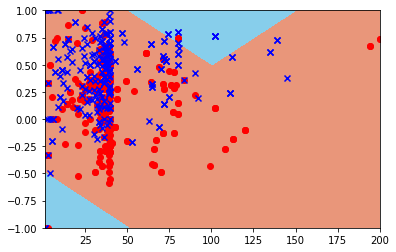

In [8]:
# K petit

# Choix du nombre de plus proche voisin
k = 3

# Création du classifieur KNN et entrainement sur les données test
classique_knn = Classifiers.ClassifierKNN(2, k)
classique_knn.train(X_train, Y_train)

# Affichage des résultats
print("Pour k=", k, "voisins on a :")
print("Accuracy value =", classique_knn.accuracy(X_test, Y_test))
utils.plot_frontiere(X,Y, classique_knn)
utils.plot2DSet(X, Y)

Pour k = 3 voisins on a :
Accuracy value = 0.6875


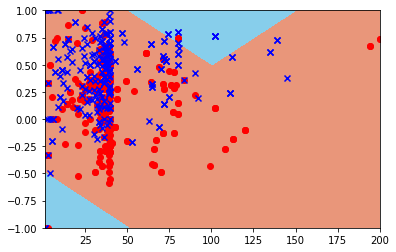

In [9]:
for i in range(10) : classique_knn.train(X_train, Y_train)

# Affichage des résultats
print("Pour k =", k, "voisins on a :")
print("Accuracy value =", classique_knn.accuracy(X_test, Y_test))
utils.plot_frontiere(X,Y, classique_knn)
utils.plot2DSet(X, Y)

Pour k = 10 voisins on a :
Accuracy value = 0.65


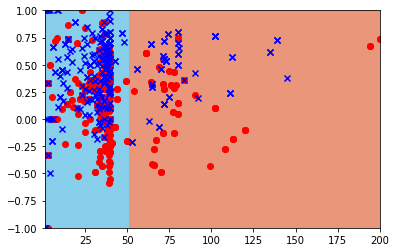

In [10]:
# K élevé

# Choix du nombre de plus proche voisin
k = 10

# Création du classifieur KNN et entrainement sur les données test
classique_knn2 = Classifiers.ClassifierKNN(2, k)
classique_knn2.train(X_train, Y_train)

# Affichage des résultats
print("Pour k =", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X_test, Y_test))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

Pour k = 10 voisins on a :
Accuracy value = 0.65


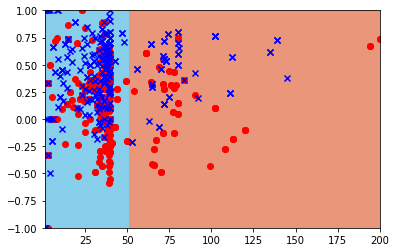

In [11]:
for i in range(100): classique_knn2.train(X_train, Y_train)

# Affichage des résultats
print("Pour k =", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X_test, Y_test))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

Pour k = 3 voisins on a :
Accuracy value = 0.8222222222222222


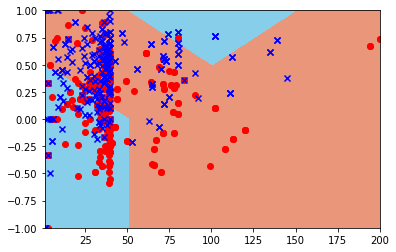

In [12]:
#Entrainement et test sur toutes les données (biaisé)

# Choix du nombre de plus proche voisin
k = 3

# Création du classifieur KNN et entrainement sur les données test
classique_knn2 = Classifiers.ClassifierKNN(2, k)
classique_knn2.train(X, Y)

# Affichage des résultats
print("Pour k =", k, "voisins on a :")
print("Accuracy value =", classique_knn2.accuracy(X, Y))
utils.plot_frontiere(data_desc_g, data_label_g, classique_knn2)
utils.plot2DSet(data_desc_g, data_label_g)

In [13]:
# On vérifie les données
k = 3
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierKNN(2,k)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global de KNN pour k = {k:d} :\tmoyenne = {perf.mean():.3f}\técart-type = {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6111111111111112
Apprentissage  2 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5925925925925926
Apprentissage  3 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5
Apprentissage  4 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.7037037037037037
Apprentissage  5 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6111111111111112
Apprentissage  6 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6851851851851852
Apprentissage  7 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5740740740740741
Apprentissage  8 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6296296296296297
Apprentissage  9 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5740740740740741
Apprentissage  10 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6666666666666666

Résultat global de KNN pour k = 3 :	moyenne = 0.615	écart-type = 0.057


In [14]:
# On vérifie les données
k = 10
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierKNN(2,k)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global de KNN pour k = {k:d} :\tmoyenne = {perf.mean():.3f}\técart-type = {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.7037037037037037
Apprentissage  2 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.4074074074074074
Apprentissage  3 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.48148148148148145
Apprentissage  4 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5925925925925926
Apprentissage  5 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.46296296296296297
Apprentissage  6 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6481481481481481
Apprentissage  7 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.42592592592592593
Apprentissage  8 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6666666666666666
Apprentissage  9 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5925925925925926
Apprentissage  10 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5555555555555556

Résultat global de KNN pour k = 10 :	moyenne = 0.554	écart-type = 0.099


### 2.Perceptron de Rosenblatt

Accuracy du perceptron ( 0.01 ) après 1 train:  0.525
Vecteur de poids trouvé:  [-0.09        0.29971072]


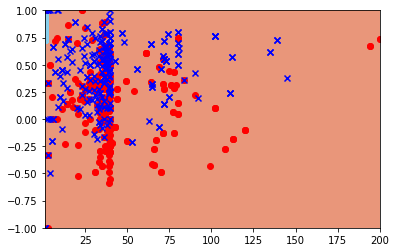

In [15]:
# Choix du learning rate
learning_rate = 0.01

# Création d'un perceptron
perceptronV0 = Classifiers.ClassifierPerceptron(2, learning_rate, history=True)

# Entraînement du classifier:
perceptronV0.train(X_train,Y_train)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0.accuracy(X_test,Y_test))
print("Vecteur de poids trouvé: ", perceptronV0.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,perceptronV0,step=150)
utils.plot2DSet(X,Y)

Accuracy du perceptron ( 0.01 ) après les 11 train:  0.525
Vecteur de poids trouvé:  [-0.3         2.51349594]


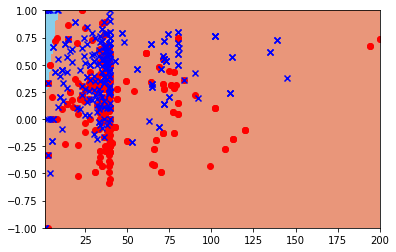

In [16]:
# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    perceptronV0.train(X_train,Y_train)
    
# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0.accuracy(X_test,Y_test))  
print("Vecteur de poids trouvé: ", perceptronV0.getW())

# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV0,step=150)
utils.plot2DSet(X,Y)

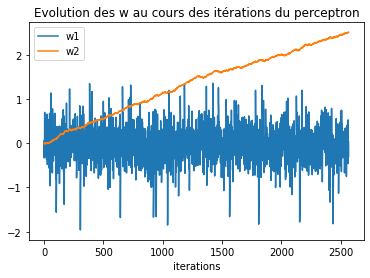

In [17]:
# Affichage de l'évolution du coût

# récupération de l'évolution des w au cours de l'apprentissage 
allw = np.array(perceptronV0.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Accuracy du perceptron ( 0.01 ) après 1 train:  0.5259259259259259
Vecteur de poids trouvé:  [-0.01        0.33952588]


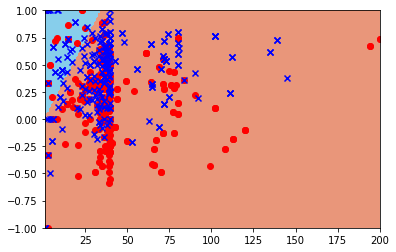

In [18]:
#Entrainement et test sur toutes les données (biaisé)

# Création d'un perceptron
perceptronV0_bis = Classifiers.ClassifierPerceptron(2, learning_rate, history=True)

# Entraînement du classifier:
perceptronV0_bis.train(X,Y)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après 1 train: ",perceptronV0_bis.accuracy(X,Y))
print("Vecteur de poids trouvé: ", perceptronV0_bis.getW())

# Affichage de la frontière de séparation des classes
# On augmente la qualité du tracé en prenant un step élevé:
utils.plot_frontiere(X,Y,perceptronV0_bis,step=150)
utils.plot2DSet(X,Y)

Accuracy du perceptron ( 0.01 ) après les 11 train:  0.5018518518518519
Vecteur de poids trouvé:  [0.16       2.92412372]


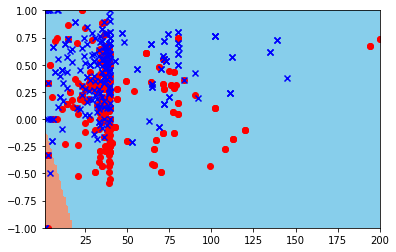

In [19]:
# on rajoute 10 appels de train après le train de la boîte précédente
for i in range(0,10):
    perceptronV0_bis.train(X,Y)
    
# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") après les 11 train: ",perceptronV0_bis.accuracy(X,Y))  
print("Vecteur de poids trouvé: ", perceptronV0_bis.getW())

# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV0_bis,step=150)
utils.plot2DSet(X,Y)

In [20]:
# Cross-validation
learning_rate = 0.01
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])


perf = np.array(perf)
print(f'\nRésultat global du Perceptron:\tmoyenne = {perf.mean():.3f}\técart-type = {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6111111111111112
Apprentissage  2 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6481481481481481
Apprentissage  3 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.42592592592592593
Apprentissage  4 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.3888888888888889
Apprentissage  5 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5
Apprentissage  6 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6481481481481481
Apprentissage  7 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6666666666666666
Apprentissage  8 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5925925925925926
Apprentissage  9 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.6111111111111112
Apprentissage  10 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.4444444444444444

Résultat global du Perceptron:	moyenne = 0.554	écart-type = 0.098


### 3. Perceptron de Rosenblatt avec prise en compte du biais

Accuracy du perceptron ( 0.01 ):  0.5
Nombre de mises à jour des poids:  2566


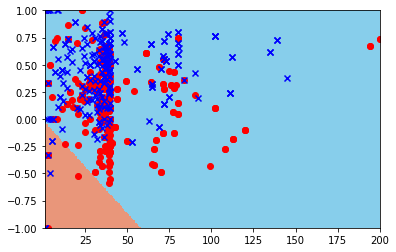

In [21]:
np.random.seed(42)   # on prend 42 comme graine

learning_rate = 0.01

# Création et entraînement du perceptron sur les données générées
perceptronV1 = Classifiers.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,500):
    perceptronV1.train(X_train,Y_train)

# Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV1.accuracy(X_test,Y_test))  
print("Nombre de mises à jour des poids: ",len(allw))
# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV1,step=150)
utils.plot2DSet(X,Y)

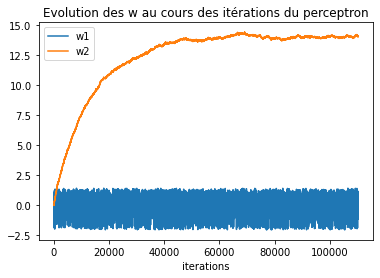

In [22]:
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perceptronV1.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Accuracy de perceptron ( 0.01 ):  0.5351851851851852
Nombre de mises à jour des poids:  110316


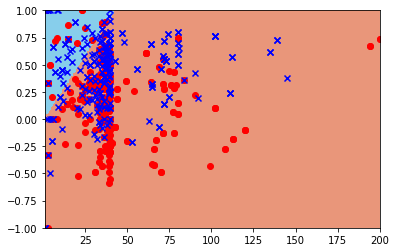

In [23]:
# Entrainement et test sur toutes les données (biaisé)
learning_rate = 0.01

# Création et entraînement du perceptron sur les données générées
perceptronV1_bis = Classifiers.ClassifierPerceptronBiais(2, learning_rate, history=True)

# on rajoute 10 appels de train après le train de la boîte précédente:
for i in range(0,500):
    perceptronV1_bis.train(X,Y)

# Performance de ce classifieur:
print("Accuracy de perceptron (", learning_rate,"): ",perceptronV1_bis.accuracy(X,Y))  
print("Nombre de mises à jour des poids: ",len(allw))
# Affichage de la frontière de séparation des classes
utils.plot_frontiere(X,Y,perceptronV1_bis,step=150)
utils.plot2DSet(X,Y)

In [24]:
# Cross-validation
perf = []
learning_rate = 0.01
niter = 10

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = utils.crossval(X, Y, niter, i)
    cl = Classifiers.ClassifierPerceptronBiais(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

perf = np.array(perf)
print(f'\nRésultat global du Perceptron Biais:\tmoyenne = {perf.mean():.3f}\técart-type = {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.4074074074074074
Apprentissage  2 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.3148148148148148
Apprentissage  3 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.4074074074074074
Apprentissage  4 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.3888888888888889
Apprentissage  5 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5
Apprentissage  6 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.46296296296296297
Apprentissage  7 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.35185185185185186
Apprentissage  8 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.5
Apprentissage  9 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.42592592592592593
Apprentissage  10 :	  |Yapp|=  486  |Ytest|=  54 	perf=  0.4444444444444444

Résultat global du Perceptron Biais:	moyenne = 0.420	écart-type = 0.057


## Partie 6 - Analyse

### 1. Résultats par classifier et train

| Classifier | Train |   Accuracy | Commentaire
|----------|:-------------:|:------:| :------:| 
| KNN (k=3)| 1 | 69% | 
| KNN (k=3)| 11 | 69% |
| KNN (k=10)| 1 | 65% |
| KNN (k=10)| 11 | 65% |
| KNN biaisé| 1 | 82% |
| Perceptron| 1 | 52.5% | 
| Perceptron| 11 | 52.5% |
| Perceptron biaisé| 1 | 52.5% |
| Perceptron biaisé| 11 | 50% |
| Perceptron avec Biais| 1 | 50% |
| Perceptron avec Biais| 11 | 53.5% |

Remarque : "biaisé" pour les classifiers dont les données d'entraînement == données de test

On peut constater ici que le sur-apprentissage n'est d'aucune utilité, et que les classifiers Perceptron ne sont pas adapté à prendre en compte nos données. 

Le classifiers KNN nous donne une accuracy un peu plus élevé que la moyenne, qu'importe le nombre de voisins prise en compte.


### 2. Récapitulatif de la cross-validation (10%/90%)
 
| Classifier | Minimum | Moyenne | Maximum | Ecart-type
|----------|:-------------:|:------:|:------:|:------:| 
| KNN (k=3)| 50% | 61.5%   | 70% | 0.057
| KNN (k=10)| 40% | 55.4% |70%|0.099
| Perceptron| 38% | 55.4% | 66% | 0.098
| Perceptron biais| 31% | 42% | 46% | 0.057
 
Le meilleure résultat possible est obtenu avec le classifier KNN. 

Néanmoins, les plus grosses fluctuations constatée (> 30%) sont aussi constatée sur les classifiers KNN, on ne peut donc pas utiliser ces résultats comme référence. 

### 3. Conclusion

Au vu des résultats obtenus, il nous est impossible d'émettre une conclusion sur la problématique. 

On ne sait donc pas si les consommateurs ont tendance ou non à laisser plus d'avis négatifs que positifs. 
